In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("operational_risk_data.csv")
df.head()


,Date,Unique Event ID,Event Type,Business Line,Event Description,Net Loss Amount
0,2022-04-16 13:01:40.732488,EID00000,Regulatory Violation,Credit Card Services,Lost assets,-6936.749161
1,2022-02-10 13:01:40.732488,EID00001,Market Risk,Credit Card Services,Unauthorized transaction,4068.277272
2,2021-08-30 13:01:40.732488,EID00002,System Failure,Credit Card Services,Regulatory fines,-8313.626703
3,2022-07-15 13:01:40.732488,EID00003,Theft,Asset Management,Supplier issues,8114.407520
4,2023-07-18 13:01:40.732488,EID00004,Cyber Attack,Investment Banking,Internal fraud,6479.242493


In [5]:
# Check for missing values and data types
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Unique Event ID    10000 non-null  object 
 2   Event Type         10000 non-null  object 
 3   Business Line      10000 non-null  object 
 4   Event Description  10000 non-null  object 
 5   Net Loss Amount    10000 non-null  float64
dtypes: float64(1), object(5)
memory usage: 468.9+ KB
None
Date                 0
Unique Event ID      0
Event Type           0
Business Line        0
Event Description    0
Net Loss Amount      0
dtype: int64


In [6]:
# Summary statistics for numeric columns
print(df.describe())


       Net Loss Amount
count     10000.000000
mean        -56.934844
std        5761.381488
min       -9998.196972
25%       -4947.893012
50%        -108.765154
75%        4931.232249
max        9999.920423


In [7]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year, month, and quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')


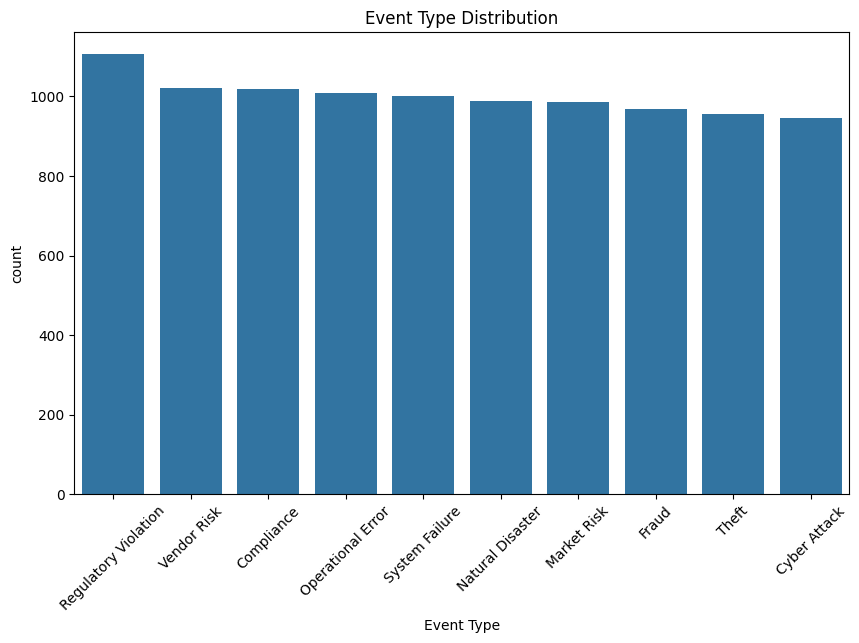

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of Event Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Event Type Distribution")
plt.show()


<Figure size 1200x600 with 0 Axes>

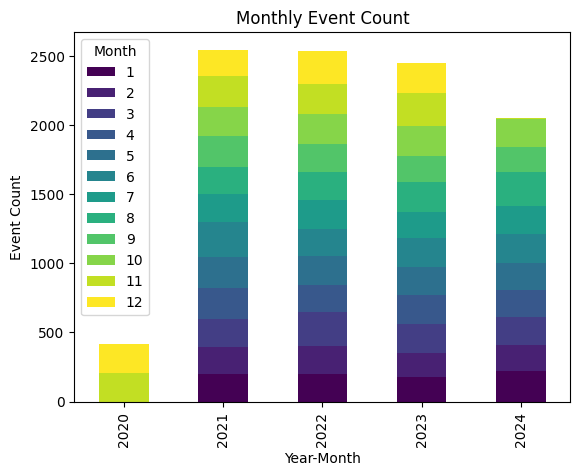

In [9]:
# Monthly distribution of events
monthly_events = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Quarterly analysis
quarterly_events = df.groupby('Quarter').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_events.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Monthly Event Count")
plt.xlabel("Year-Month")
plt.ylabel("Event Count")
plt.show()


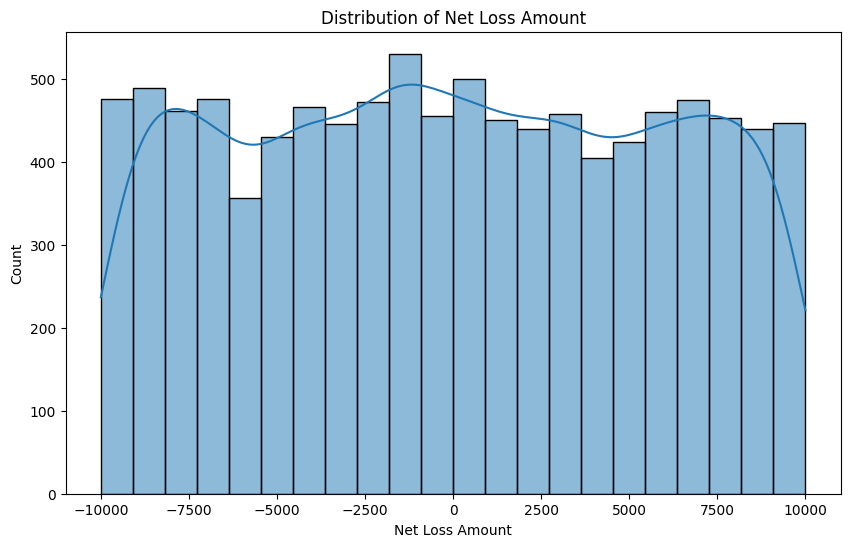

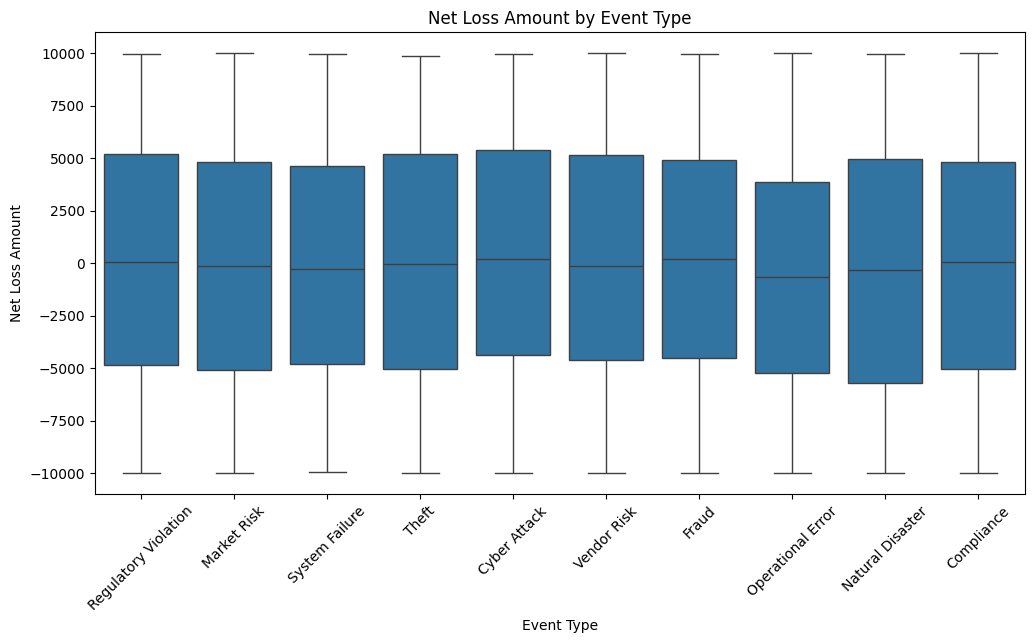

In [10]:
# Distribution of Net Loss Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Net Loss Amount'], kde=True)
plt.title("Distribution of Net Loss Amount")
plt.show()

# Box plot of Net Loss Amount by Event Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Event Type', y='Net Loss Amount')
plt.xticks(rotation=45)
plt.title("Net Loss Amount by Event Type")
plt.show()


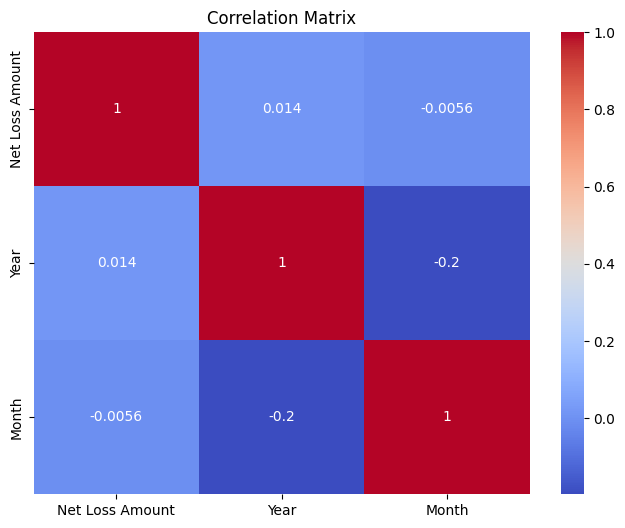

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


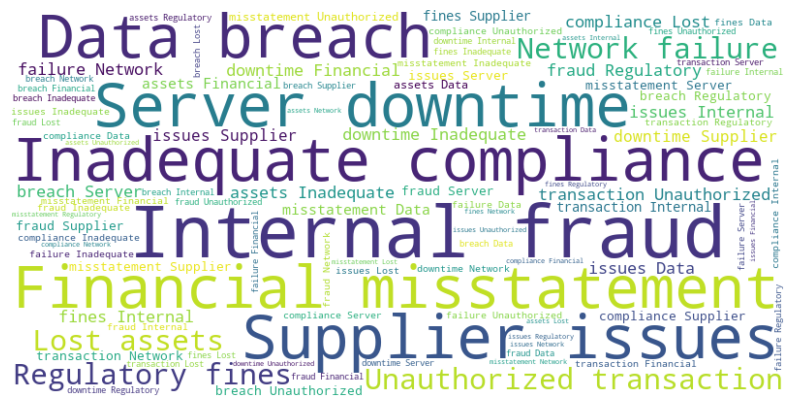

In [12]:
from wordcloud import WordCloud

# Join all descriptions for word cloud
text = " ".join(desc for desc in df['Event Description'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("operational_risk_data.csv")
df.head()


,Date,Unique Event ID,Event Type,Business Line,Event Description,Net Loss Amount
0,2022-04-16 13:01:40.732488,EID00000,Regulatory Violation,Credit Card Services,Lost assets,-6936.749161
1,2022-02-10 13:01:40.732488,EID00001,Market Risk,Credit Card Services,Unauthorized transaction,4068.277272
2,2021-08-30 13:01:40.732488,EID00002,System Failure,Credit Card Services,Regulatory fines,-8313.626703
3,2022-07-15 13:01:40.732488,EID00003,Theft,Asset Management,Supplier issues,8114.407520
4,2023-07-18 13:01:40.732488,EID00004,Cyber Attack,Investment Banking,Internal fraud,6479.242493


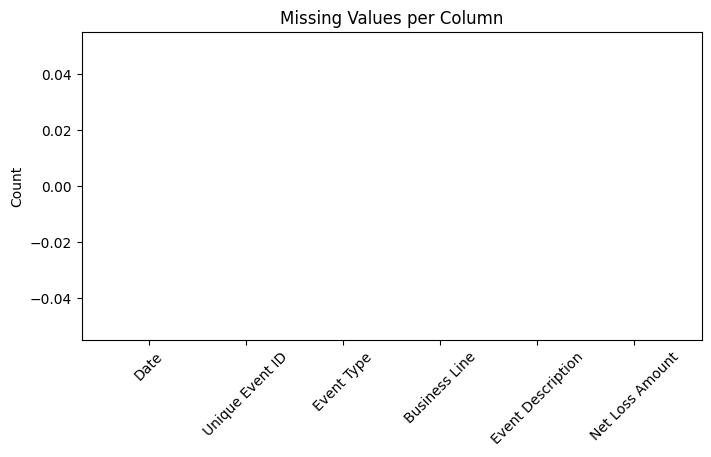

In [17]:
# Check for missing values
missing = df.isnull().sum()
plt.figure(figsize=(8, 4))
plt.bar(missing.index, missing.values, color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [18]:
# Summary statistics
print(df.describe())


       Net Loss Amount
count     10000.000000
mean        -56.934844
std        5761.381488
min       -9998.196972
25%       -4947.893012
50%        -108.765154
75%        4931.232249
max        9999.920423


In [19]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')


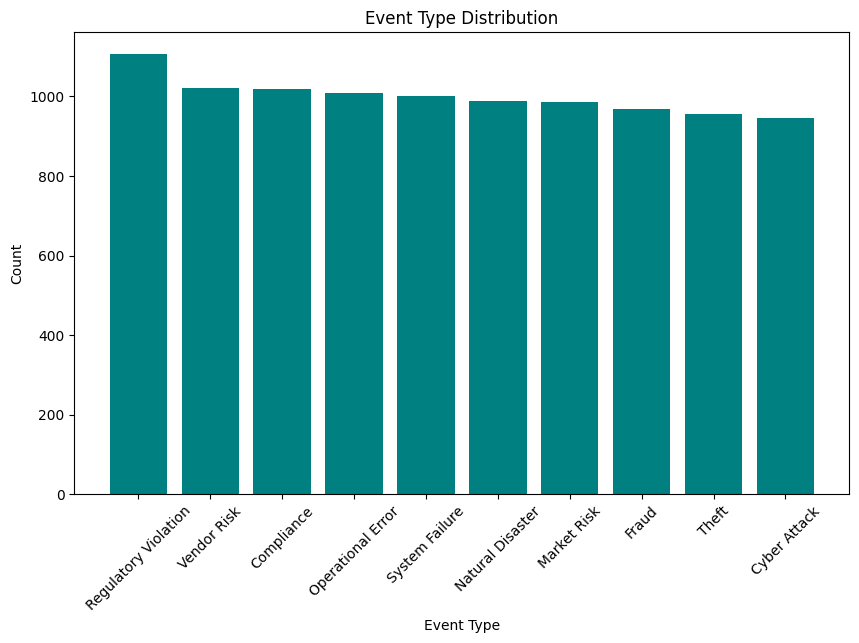

In [20]:
# Count plot of Event Types
event_counts = df['Event Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(event_counts.index, event_counts.values, color='teal')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


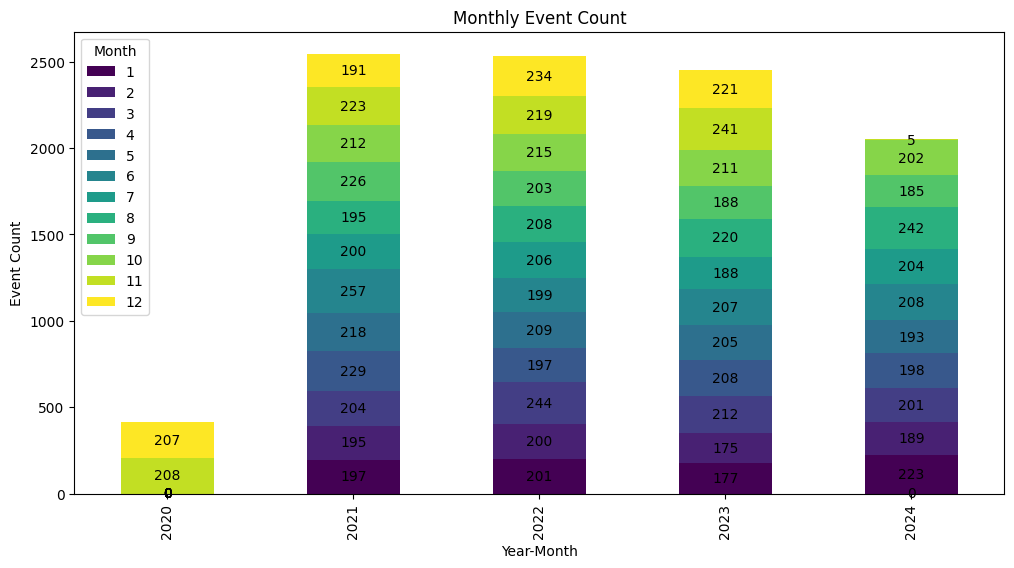

In [21]:
# Monthly distribution of events
monthly_events = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
monthly_events.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title("Monthly Event Count")
plt.xlabel("Year-Month")
plt.ylabel("Event Count")

# Adding data labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center')

plt.show()


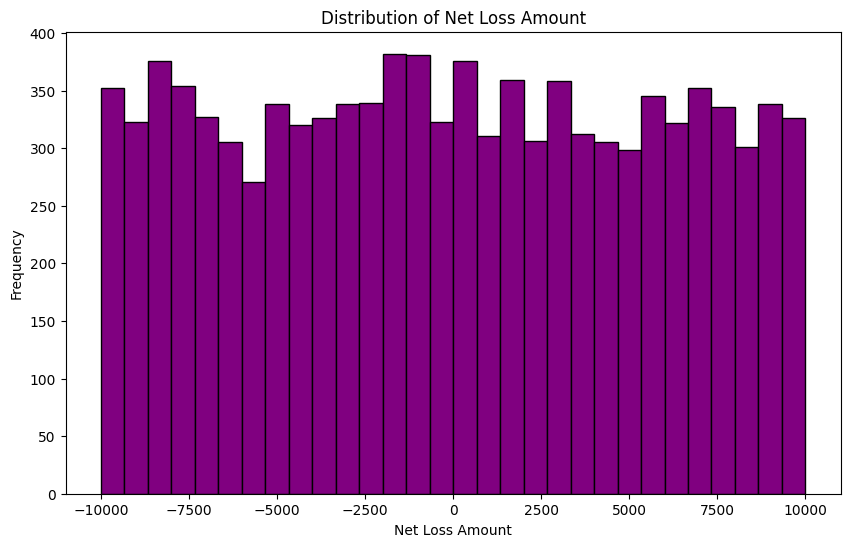

<Figure size 1200x600 with 0 Axes>

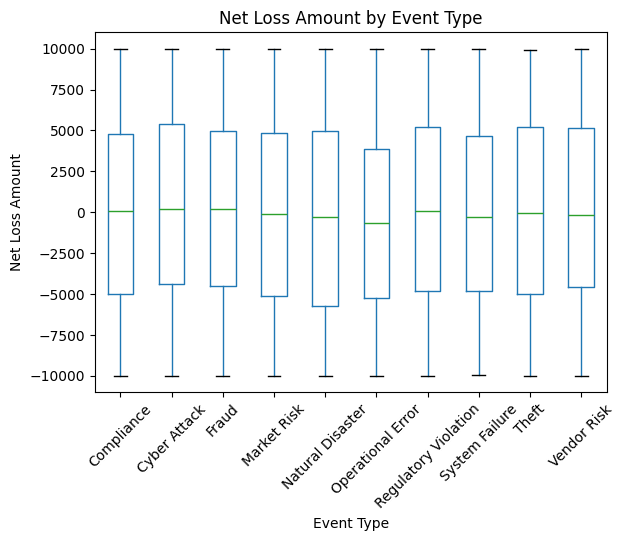

In [23]:
# Distribution of Net Loss Amount
plt.figure(figsize=(10, 6))
plt.hist(df['Net Loss Amount'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Net Loss Amount")
plt.xlabel("Net Loss Amount")
plt.ylabel("Frequency")
plt.show()

# Box plot of Net Loss Amount by Event Type
plt.figure(figsize=(12, 6))
df.boxplot(column='Net Loss Amount', by='Event Type', grid=False)
plt.title("Net Loss Amount by Event Type")
plt.suptitle('')
plt.xlabel("Event Type")
plt.ylabel("Net Loss Amount")
plt.xticks(rotation=45)
plt.show()


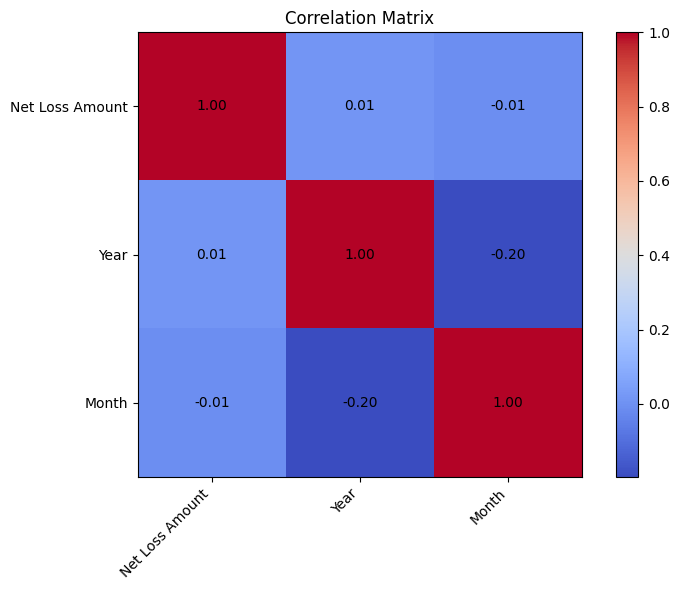

In [24]:
import numpy as np

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix")

# Setting up the x and y ticks with column names
tick_marks = np.arange(len(corr.columns))
plt.xticks(tick_marks, corr.columns, rotation=45, ha='right')
plt.yticks(tick_marks, corr.columns)

# Annotate each cell with the correlation value
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color="black")

plt.tight_layout()
plt.show()


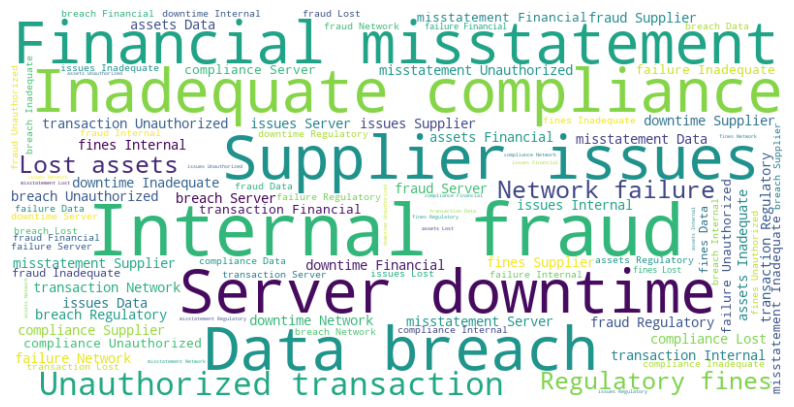

In [25]:
from collections import Counter
from wordcloud import WordCloud

# Combine all descriptions
text = " ".join(df['Event Description'].dropna().astype(str).values)
word_counts = Counter(text.split())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


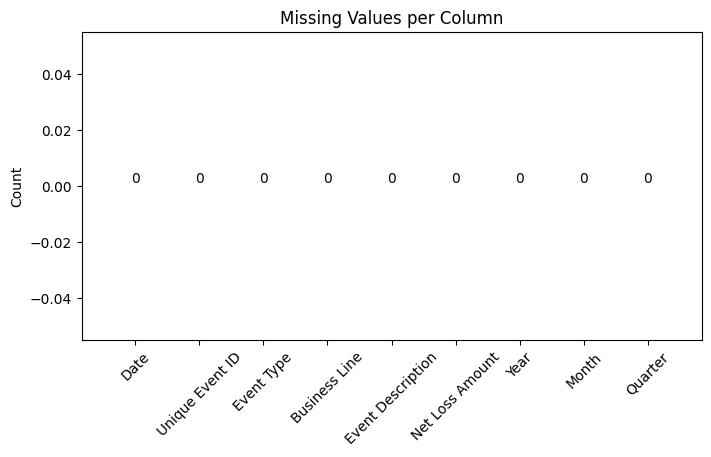

In [26]:
# Check for missing values
missing = df.isnull().sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(missing.index, missing.values, color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


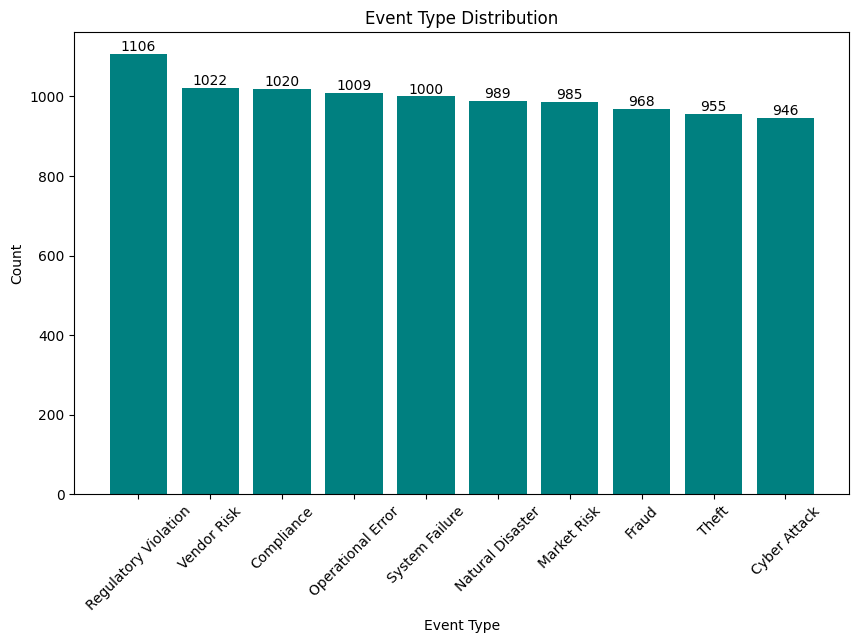

In [27]:
# Count plot of Event Types
event_counts = df['Event Type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(event_counts.index, event_counts.values, color='teal')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


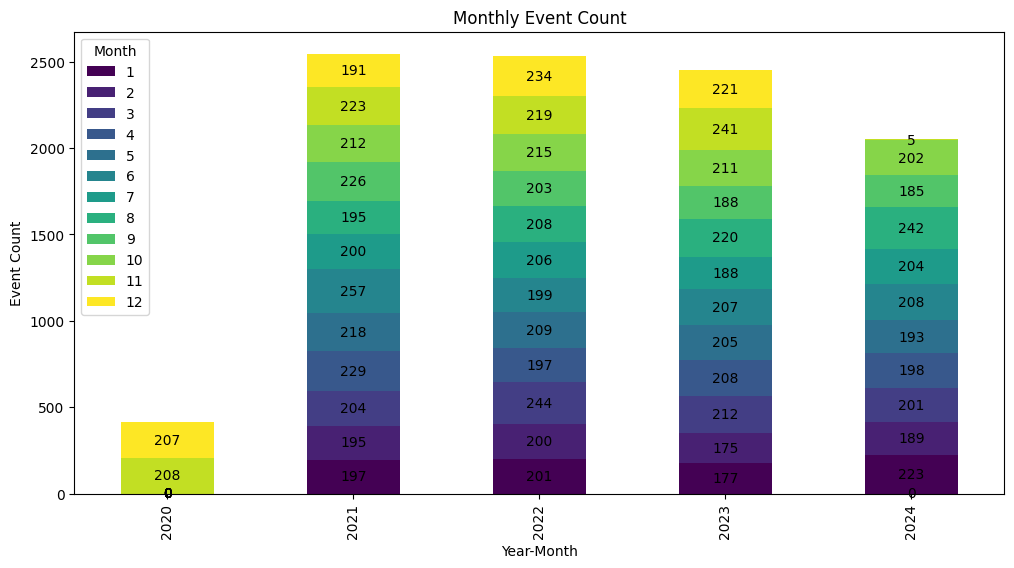

In [28]:
# Monthly distribution of events
monthly_events = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
ax = monthly_events.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title("Monthly Event Count")
plt.xlabel("Year-Month")
plt.ylabel("Event Count")

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()


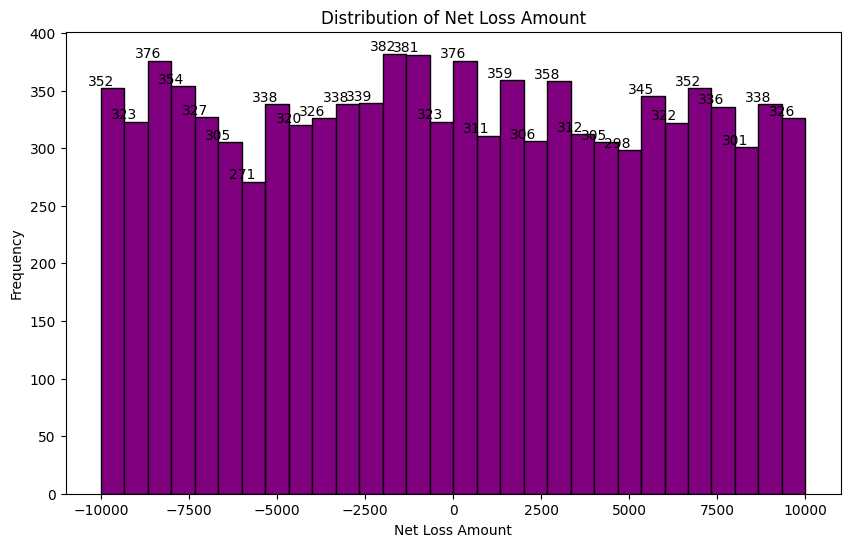

In [29]:
# Distribution of Net Loss Amount
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['Net Loss Amount'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Net Loss Amount")
plt.xlabel("Net Loss Amount")
plt.ylabel("Frequency")

# Adding data labels
for count, bin in zip(counts, bins):
    plt.text(bin, count, int(count), ha='center', va='bottom')

plt.show()


<Figure size 1200x600 with 0 Axes>

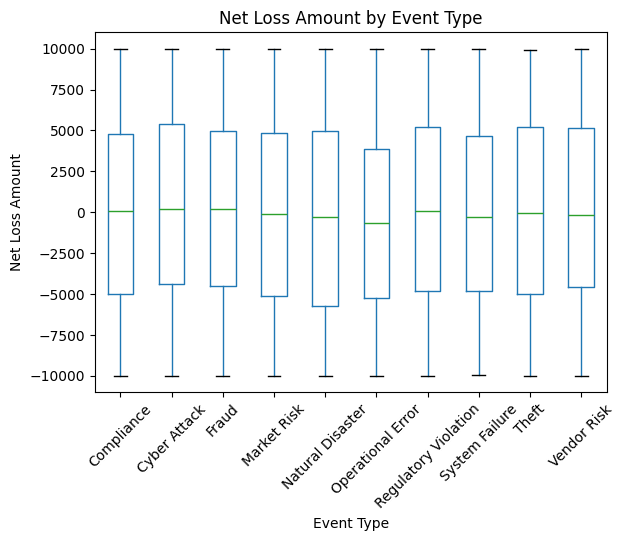

In [30]:
# Box plot of Net Loss Amount by Event Type
plt.figure(figsize=(12, 6))
ax = df.boxplot(column='Net Loss Amount', by='Event Type', grid=False)
plt.title("Net Loss Amount by Event Type")
plt.suptitle('')
plt.xlabel("Event Type")
plt.ylabel("Net Loss Amount")
plt.xticks(rotation=45)

# Adding median labels
for line in ax.get_lines():
    if line.get_label() == 'medians':
        for median in line.get_ydata():
            plt.text(line.get_xdata()[1], median, f"{median:.2f}", ha='center', va='bottom')

plt.show()


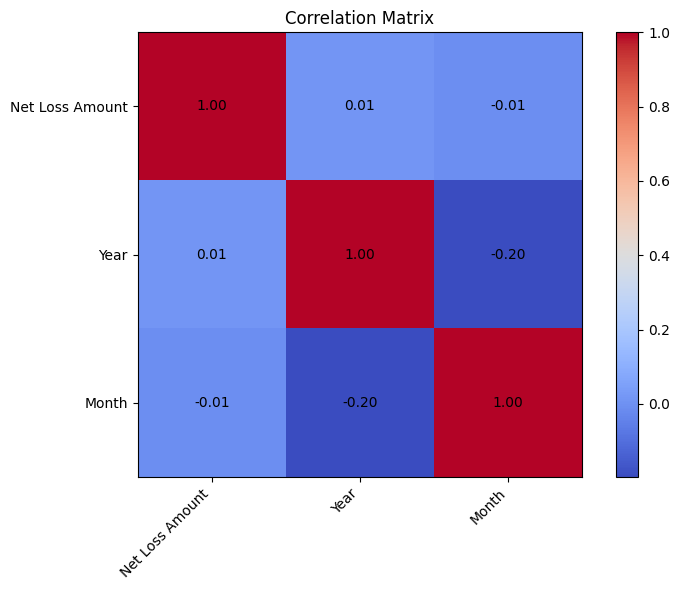

In [31]:
import numpy as np

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix")

# Setting up the x and y ticks with column names
tick_marks = np.arange(len(corr.columns))
plt.xticks(tick_marks, corr.columns, rotation=45, ha='right')
plt.yticks(tick_marks, corr.columns)

# Annotate each cell with the correlation value
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color="black")

plt.tight_layout()
plt.show()


In [33]:
# Extract Year if not already done
df['Year'] = df['Date'].dt.year

# Aggregate data by Year
yearly_aggregation = df.groupby('Year').agg(
    total_net_loss=('Net Loss Amount', 'sum'),
    event_count=('Unique Event ID', 'count')
).reset_index()

print(yearly_aggregation)


   Year  total_net_loss  event_count
0  2020  -157322.652858          415
1  2021  -206319.782275         2547
2  2022  -363762.535849         2535
3  2023    62418.505261         2453
4  2024    95638.024008         2050


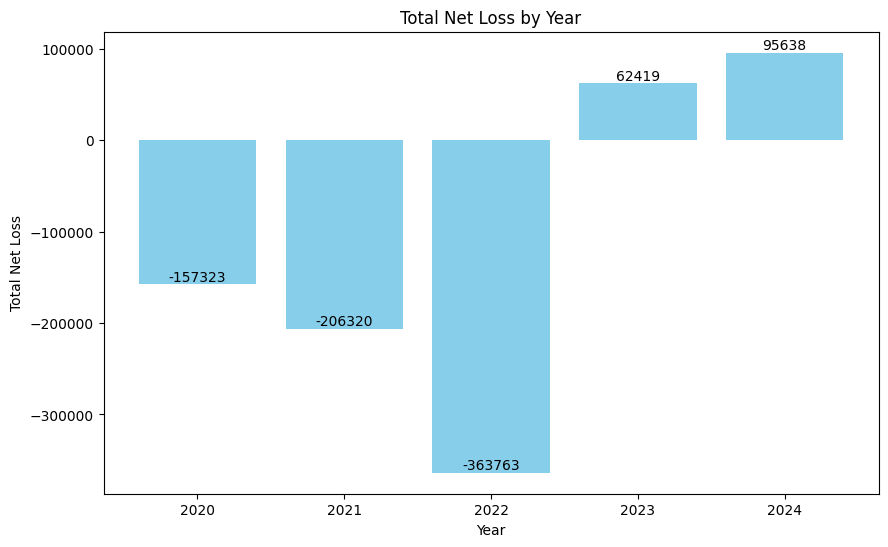

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_aggregation['Year'], yearly_aggregation['total_net_loss'], color='skyblue')
plt.title("Total Net Loss by Year")
plt.xlabel("Year")
plt.ylabel("Total Net Loss")

# Adding data labels
for i, value in enumerate(yearly_aggregation['total_net_loss']):
    plt.text(yearly_aggregation['Year'][i], value, f"{value:.0f}", ha='center', va='bottom')

plt.show()


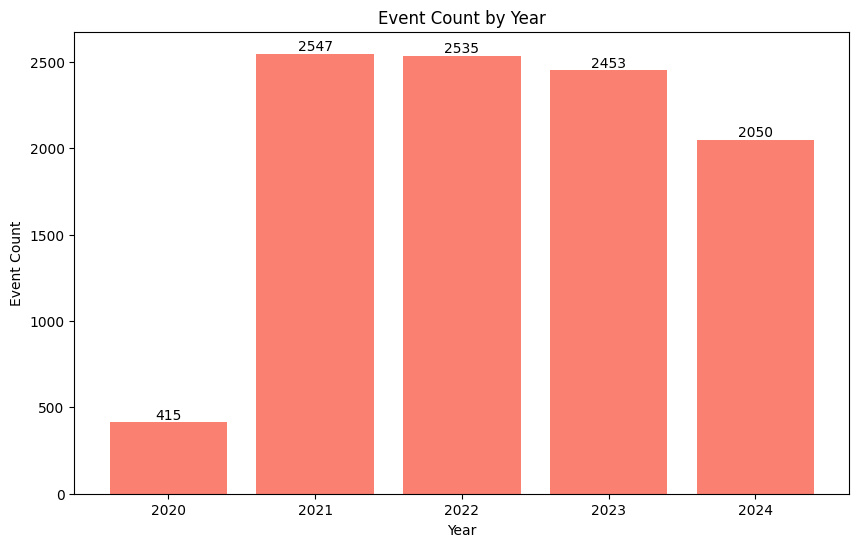

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_aggregation['Year'], yearly_aggregation['event_count'], color='salmon')
plt.title("Event Count by Year")
plt.xlabel("Year")
plt.ylabel("Event Count")

# Adding data labels
for i, value in enumerate(yearly_aggregation['event_count']):
    plt.text(yearly_aggregation['Year'][i], value, f"{value}", ha='center', va='bottom')

plt.show()


In [36]:
# Value counts for Business Line
business_line_counts = df['Business Line'].value_counts()

# Value counts for Event Type
event_type_counts = df['Event Type'].value_counts()


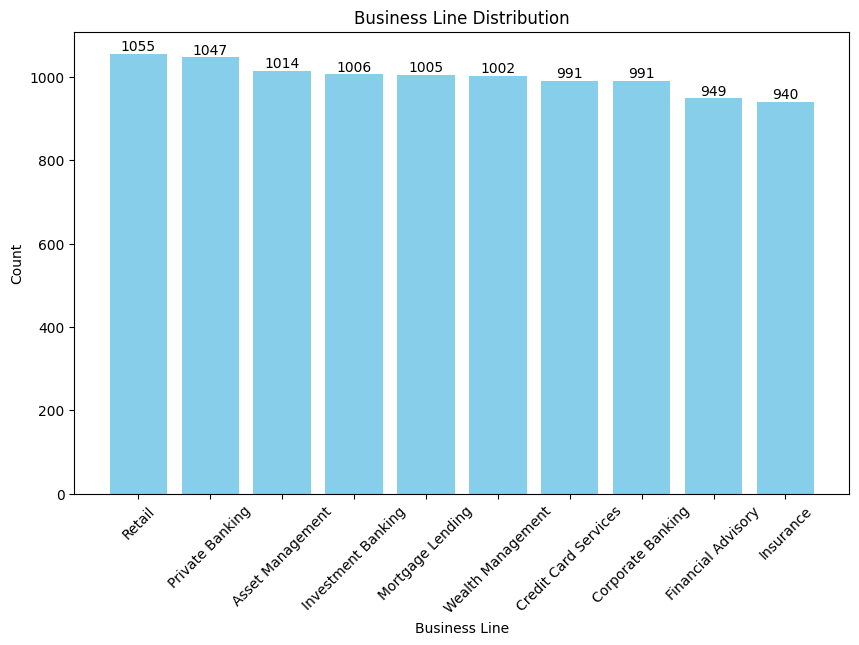

In [37]:
plt.figure(figsize=(10, 6))
bars = plt.bar(business_line_counts.index, business_line_counts.values, color='skyblue')
plt.title("Business Line Distribution")
plt.xlabel("Business Line")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


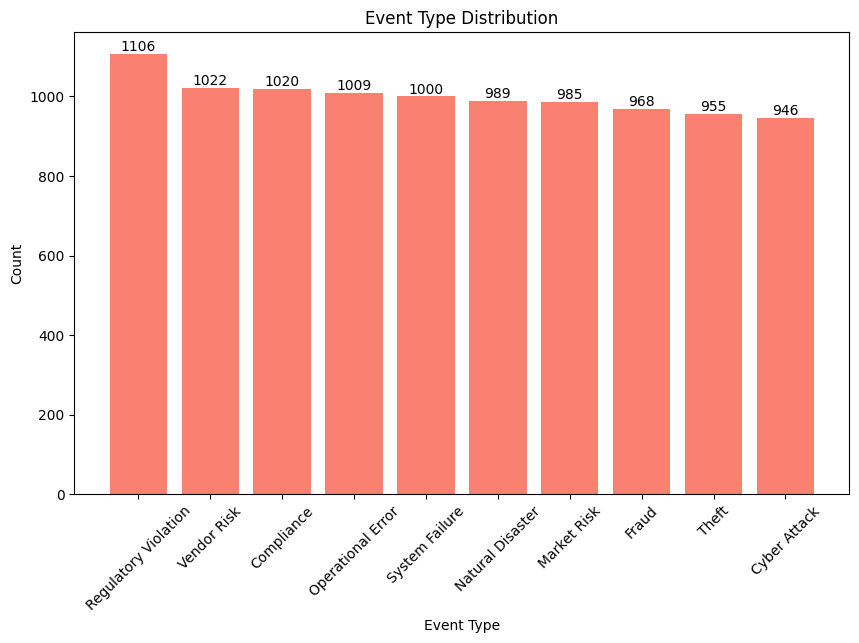

In [38]:
plt.figure(figsize=(10, 6))
bars = plt.bar(event_type_counts.index, event_type_counts.values, color='salmon')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


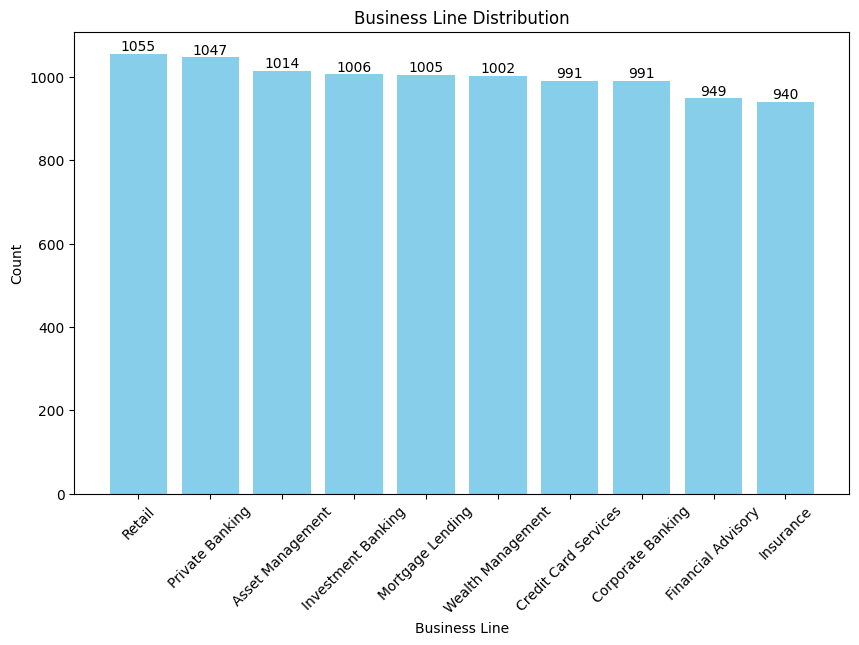

In [40]:
# Define a threshold for labeling (e.g., only label bars with counts > 100)
threshold = 100

plt.figure(figsize=(10, 6))
bars = plt.bar(business_line_counts.index, business_line_counts.values, color='skyblue')
plt.title("Business Line Distribution")
plt.xlabel("Business Line")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding data labels only for spikes
for bar in bars:
    yval = bar.get_height()
    if yval > threshold:  # Only label bars that exceed the threshold
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


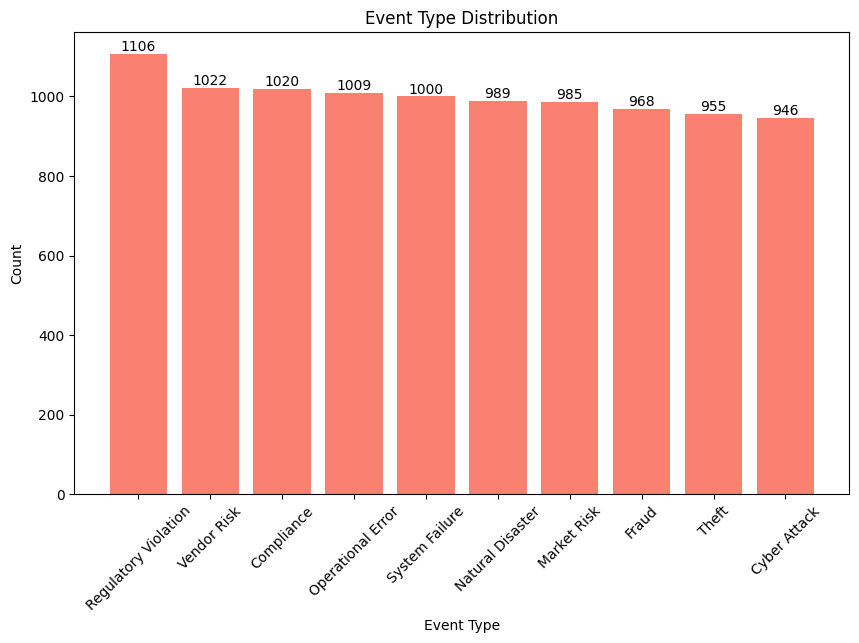

In [41]:
plt.figure(figsize=(10, 6))
bars = plt.bar(event_type_counts.index, event_type_counts.values, color='salmon')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding data labels only for spikes
for bar in bars:
    yval = bar.get_height()
    if yval > threshold:  # Only label bars that exceed the threshold
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [43]:
# Group by Business Line for event count and total net loss
business_line_aggregation = df.groupby('Business Line').agg(
    event_count=('Unique Event ID', 'count'),       # Counting unique events per Business Line
    total_net_loss=('Net Loss Amount', 'sum') # Summing up the Net Loss Amount per Business Line
).reset_index()

print(business_line_aggregation)


          Business Line  event_count  total_net_loss
0      Asset Management         1014   144885.729723
1     Corporate Banking          991    30009.379412
2  Credit Card Services          991  -125439.371998
3    Financial Advisory          949   197304.982801
4             Insurance          940  -182615.791024
5    Investment Banking         1006  -326436.302115
6      Mortgage Lending         1005    73776.209418
7       Private Banking         1047   -88412.486556
8                Retail         1055  -451097.634229
9     Wealth Management         1002   158676.842855


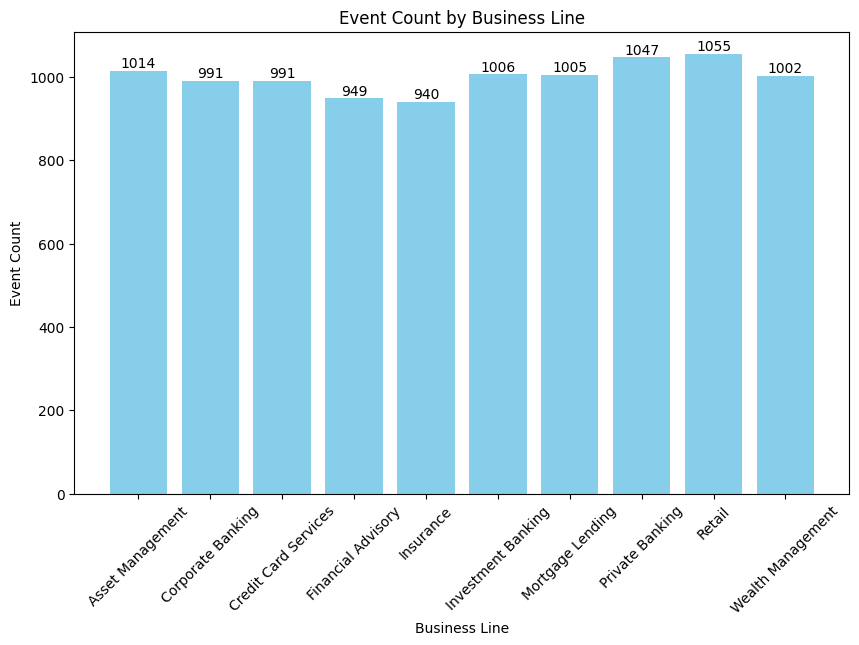

In [44]:
plt.figure(figsize=(10, 6))
bars = plt.bar(business_line_aggregation['Business Line'], business_line_aggregation['event_count'], color='skyblue')
plt.title("Event Count by Business Line")
plt.xlabel("Business Line")
plt.ylabel("Event Count")
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


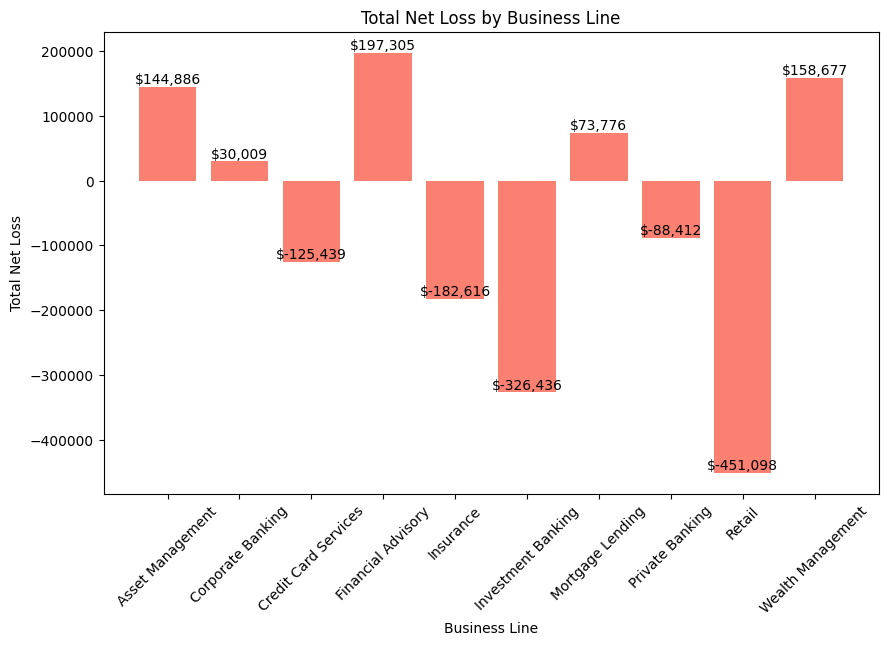

In [45]:
plt.figure(figsize=(10, 6))
bars = plt.bar(business_line_aggregation['Business Line'], business_line_aggregation['total_net_loss'], color='salmon')
plt.title("Total Net Loss by Business Line")
plt.xlabel("Business Line")
plt.ylabel("Total Net Loss")
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"${yval:,.0f}", ha='center', va='bottom')

plt.show()


In [48]:
# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year-Month for monthly aggregation (optional)
df['Year-Month'] = df['Date'].dt.to_period('M')


# Aggregate by Year-Month for event count and total net loss
monthly_aggregation = df.groupby('Year-Month').agg(
    event_count=('Unique Event ID', 'count'),
    total_net_loss=('Net Loss Amount', 'sum')
).reset_index()

# Convert 'Year-Month' back to datetime for plotting
monthly_aggregation['Year-Month'] = monthly_aggregation['Year-Month'].dt.to_timestamp()

print(monthly_aggregation)


   Year-Month  event_count  total_net_loss
0  2020-11-01          208   -82513.098204
1  2020-12-01          207   -74809.554655
2  2021-01-01          197     6063.627758
3  2021-02-01          195   150094.894053
4  2021-03-01          204   133448.183021
5  2021-04-01          229  -148363.557205
6  2021-05-01          218     6970.174521
7  2021-06-01          257   -80329.283510
8  2021-07-01          200  -166985.767723
9  2021-08-01          195   -34244.329435
10 2021-09-01          226   -23017.808497
11 2021-10-01          212   -95488.282270
12 2021-11-01          223    52328.740284
13 2021-12-01          191    -6796.373273
14 2022-01-01          201    94814.900526
15 2022-02-01          200  -150028.814293
16 2022-03-01          244   -21693.221690
17 2022-04-01          197   -11818.582461
18 2022-05-01          209   -36383.499049
19 2022-06-01          199   -94762.541051
20 2022-07-01          206     3278.990037
21 2022-08-01          208    25974.141582
22 2022-09-

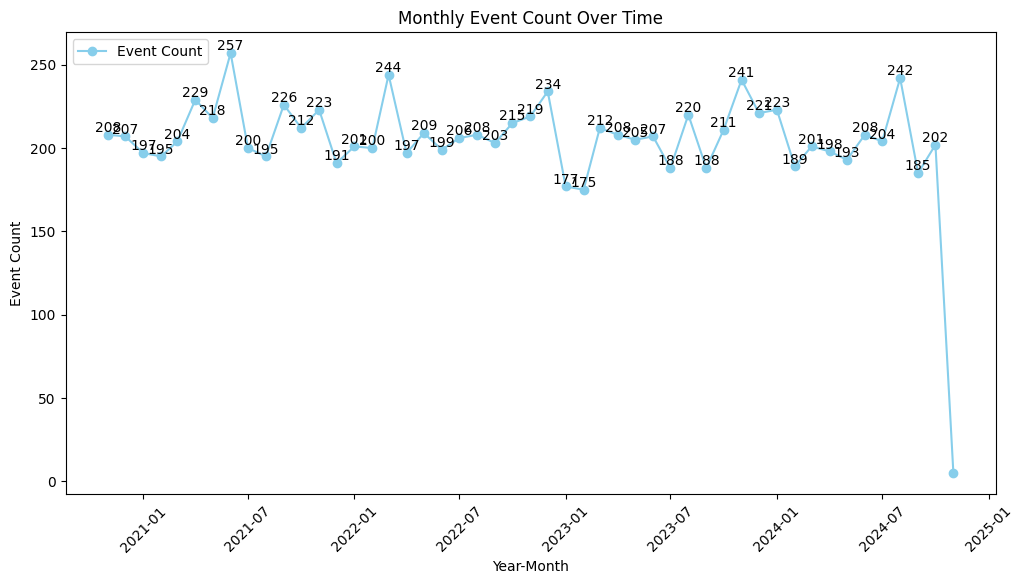

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregation['Year-Month'], monthly_aggregation['event_count'], marker='o', color='skyblue', label="Event Count")
plt.title("Monthly Event Count Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.legend()

# Adding data labels to some spikes
threshold = 100  # Label only if count exceeds 100
for i, value in enumerate(monthly_aggregation['event_count']):
    if value > threshold:
        plt.text(monthly_aggregation['Year-Month'][i], value, f"{value}", ha='center', va='bottom')

plt.show()


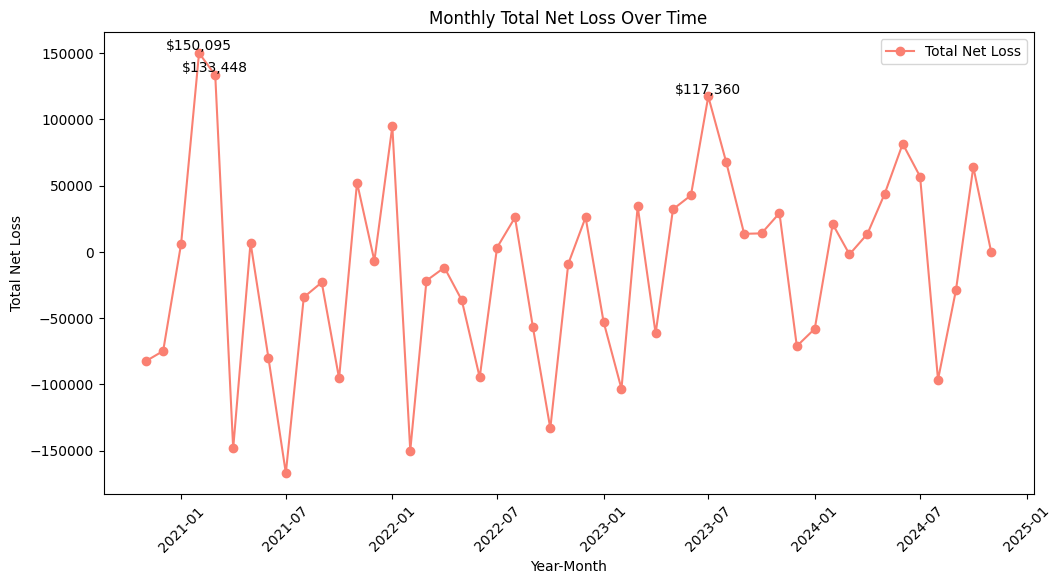

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregation['Year-Month'], monthly_aggregation['total_net_loss'], marker='o', color='salmon', label="Total Net Loss")
plt.title("Monthly Total Net Loss Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Net Loss")
plt.xticks(rotation=45)
plt.legend()

# Adding data labels to some spikes
for i, value in enumerate(monthly_aggregation['total_net_loss']):
    if value > 100000:  # Label only if net loss exceeds a threshold
        plt.text(monthly_aggregation['Year-Month'][i], value, f"${value:,.0f}", ha='center', va='bottom')

plt.show()


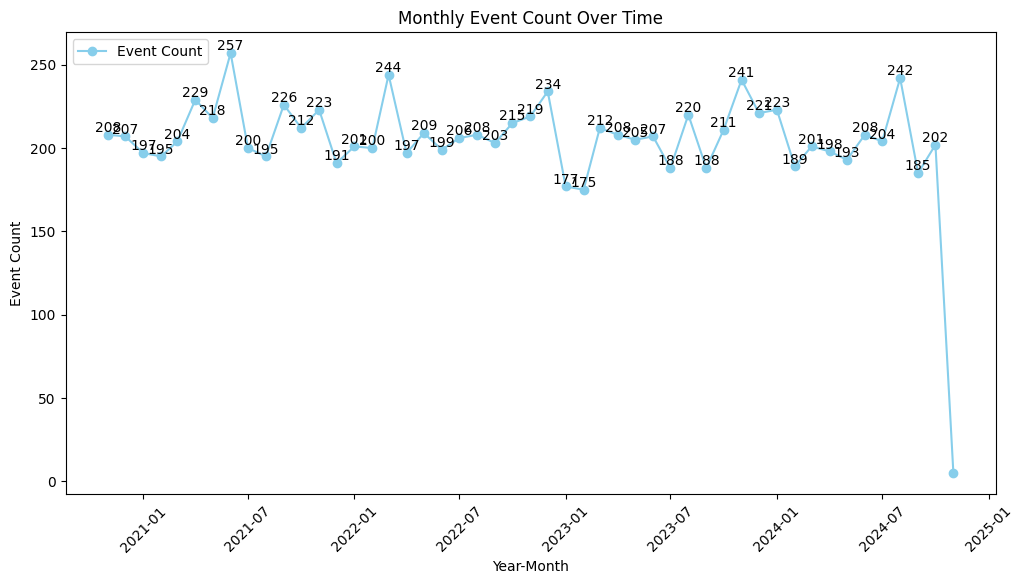

In [51]:
# Define a threshold for labeling (e.g., label only spikes where event count > 100)
threshold_event_count = 100

plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregation['Year-Month'], monthly_aggregation['event_count'], marker='o', color='skyblue', label="Event Count")
plt.title("Monthly Event Count Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.legend()

# Adding data labels only for high spikes (where event count > threshold)
for i, value in enumerate(monthly_aggregation['event_count']):
    if value > threshold_event_count:  # Only label points that exceed the threshold
        plt.text(monthly_aggregation['Year-Month'][i], value, f"{value}", ha='center', va='bottom')

plt.show()


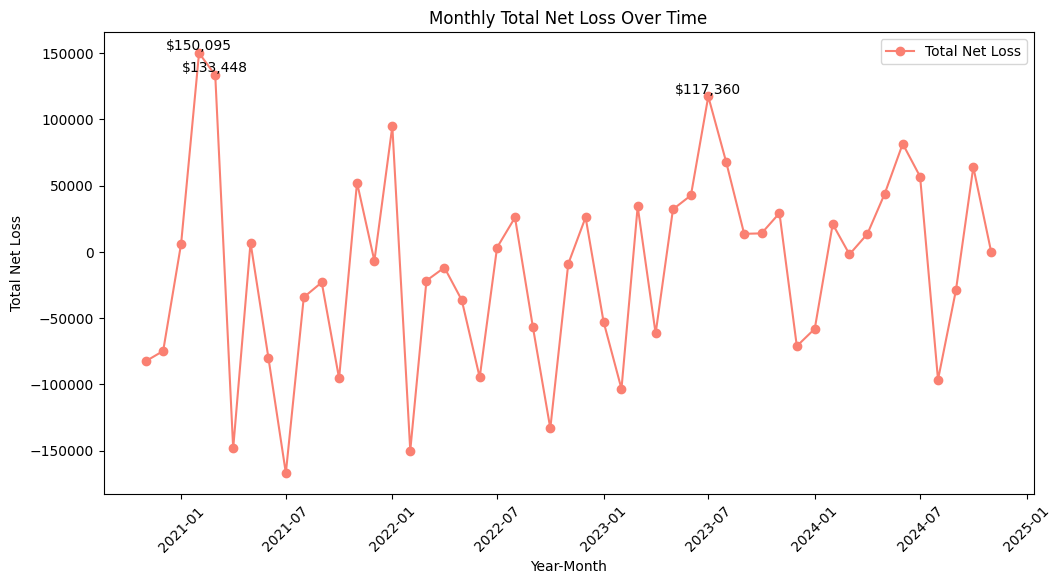

In [52]:
# Define a threshold for labeling (e.g., label only spikes where total net loss > 100,000)
threshold_net_loss = 100000

plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregation['Year-Month'], monthly_aggregation['total_net_loss'], marker='o', color='salmon', label="Total Net Loss")
plt.title("Monthly Total Net Loss Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Net Loss")
plt.xticks(rotation=45)
plt.legend()

# Adding data labels only for high spikes (where total net loss > threshold)
for i, value in enumerate(monthly_aggregation['total_net_loss']):
    if value > threshold_net_loss:  # Only label points that exceed the threshold
        plt.text(monthly_aggregation['Year-Month'][i], value, f"${value:,.0f}", ha='center', va='bottom')

plt.show()


In [53]:
import numpy as np

# Group by Business Line and Event Type, calculate the log-normal parameters
def calculate_var(group, confidence_level=0.95):
    # Calculate log-transformed net loss
    log_net_loss = np.log(group['Net Loss Amount'])
    
    # Calculate the mean and standard deviation of the log-transformed values
    mu = log_net_loss.mean()
    sigma = log_net_loss.std()
    
    # Calculate the Z-value corresponding to the confidence level
    Z_alpha = np.percentile(log_net_loss, (1 - confidence_level) * 100)
    
    # Calculate VaR (value at risk)
    var = np.exp(mu + sigma * Z_alpha)  # Back-transform the VaR to the original scale
    return var

# Apply VaR calculation to each Business Line and Event Type
var_by_business_line = df.groupby('Business Line').apply(calculate_var)
var_by_event_type = df.groupby('Event Type').apply(calculate_var)

# Display the results
print("VaR by Business Line:")
print(var_by_business_line)
print("\nVaR by Event Type:")
print(var_by_event_type)


VaR by Business Line:
Business Line
Asset Management       NaN
Corporate Banking      NaN
Credit Card Services   NaN
Financial Advisory     NaN
Insurance              NaN
Investment Banking     NaN
Mortgage Lending       NaN
Private Banking        NaN
Retail                 NaN
Wealth Management      NaN
dtype: float64

VaR by Event Type:
Event Type
Compliance             NaN
Cyber Attack           NaN
Fraud                  NaN
Market Risk            NaN
Natural Disaster       NaN
Operational Error      NaN
Regulatory Violation   NaN
System Failure         NaN
Theft                  NaN
Vendor Risk            NaN
dtype: float64


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_13200\3308153388.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_by_business_line = df.groupby('Business Line').apply(calculate_var)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_13200\3308153388.py:21: Depre

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


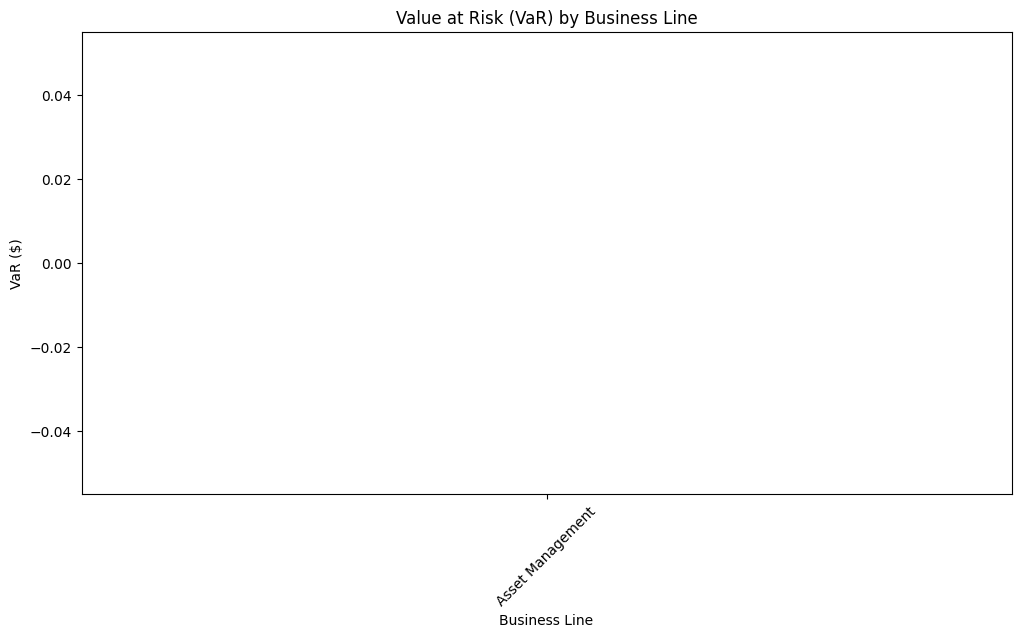

In [54]:
# Plot VaR by Business Line
plt.figure(figsize=(12, 6))
plt.bar(var_by_business_line.index, var_by_business_line.values, color='skyblue')
plt.title("Value at Risk (VaR) by Business Line")
plt.xlabel("Business Line")
plt.ylabel("VaR ($)")
plt.xticks(rotation=45)

# Adding data labels to each bar
for i, value in enumerate(var_by_business_line.values):
    plt.text(i, value, f"${value:,.0f}", ha='center', va='bottom')

plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


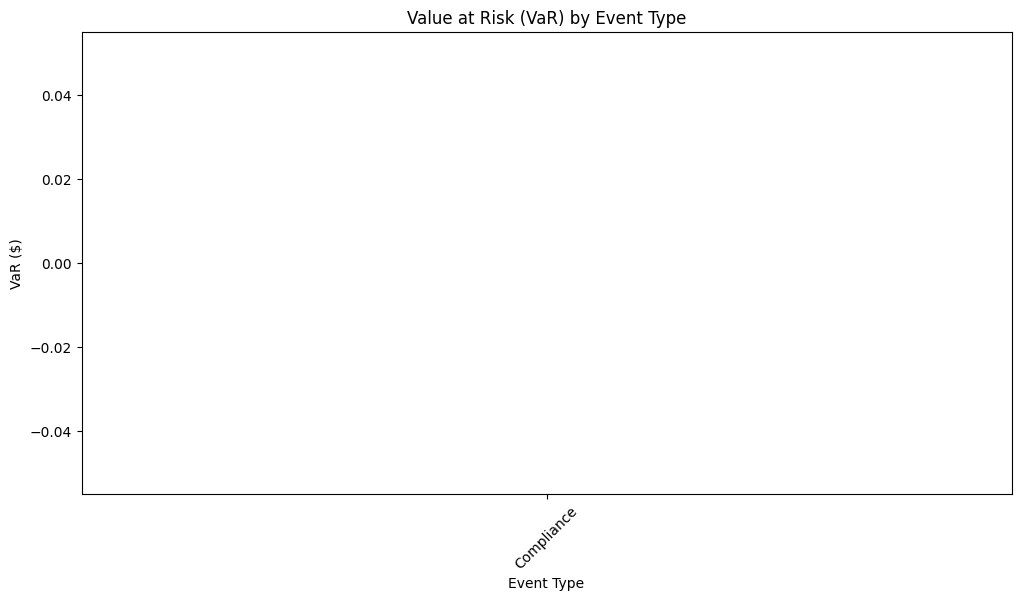

In [55]:
# Plot VaR by Event Type
plt.figure(figsize=(12, 6))
plt.bar(var_by_event_type.index, var_by_event_type.values, color='salmon')
plt.title("Value at Risk (VaR) by Event Type")
plt.xlabel("Event Type")
plt.ylabel("VaR ($)")
plt.xticks(rotation=45)

# Adding data labels to each bar
for i, value in enumerate(var_by_event_type.values):
    plt.text(i, value, f"${value:,.0f}", ha='center', va='bottom')

plt.show()


In [56]:
# Group by Business Line and Event Type
combined_group = df.groupby(['Business Line', 'Event Type']).agg(
    total_net_loss=('Net Loss Amount', 'sum'),
    total_event_count=('Unique Event ID', 'count')
).reset_index()

# Display the combined total values
print(combined_group)


        Business Line            Event Type  total_net_loss  total_event_count
0    Asset Management            Compliance    92618.681203                 92
1    Asset Management          Cyber Attack   141953.292740                127
2    Asset Management                 Fraud    15343.050444                 94
3    Asset Management           Market Risk    37032.886314                 87
4    Asset Management      Natural Disaster   -86935.763800                100
..                ...                   ...             ...                ...
95  Wealth Management     Operational Error   -81759.103142                 97
96  Wealth Management  Regulatory Violation   107754.845549                118
97  Wealth Management        System Failure    17335.261801                120
98  Wealth Management                 Theft    36140.076492                100
99  Wealth Management           Vendor Risk   -38258.987878                 98

[100 rows x 4 columns]


In [58]:
import numpy as np
import pandas as pd

# Function to calculate VaR for lognormal distribution
def calculate_var(group, confidence_level=0.95):
    # Log-transform the net loss and event count values
    log_net_loss = np.log(group['total_net_loss'][group['total_net_loss'] > 0])  # Log-transform net loss (avoid log(0))
    log_event_count = np.log(group['total_event_count'][group['total_event_count'] > 0])  # Log-transform event count (avoid log(0))
    
    # Calculate mean and std of log-transformed values
    mu_net_loss = log_net_loss.mean()
    sigma_net_loss = log_net_loss.std()
    mu_event_count = log_event_count.mean()
    sigma_event_count = log_event_count.std()
    
    # Calculate Z value for confidence level (standard normal distribution)
    z_alpha = np.percentile(np.random.normal(0, 1, 100000), (1 - confidence_level) * 100)

    # Calculate VaR (log-normal back-transformed)
    var_net_loss = np.exp(mu_net_loss + sigma_net_loss * z_alpha)
    var_event_count = np.exp(mu_event_count + sigma_event_count * z_alpha)
    
    return pd.Series({'VaR Net Loss': var_net_loss, 'VaR Event Count': var_event_count})

# Assuming 'combined_group' is the DataFrame with Business Line and Event Type aggregation
# Apply VaR calculation
combined_group[['VaR Net Loss', 'VaR Event Count']] = combined_group.apply(calculate_var, axis=1)

# Display the combined results
print(combined_group)


TypeError: 'float' object is not subscriptable

KeyError: 'VaR Net Loss'

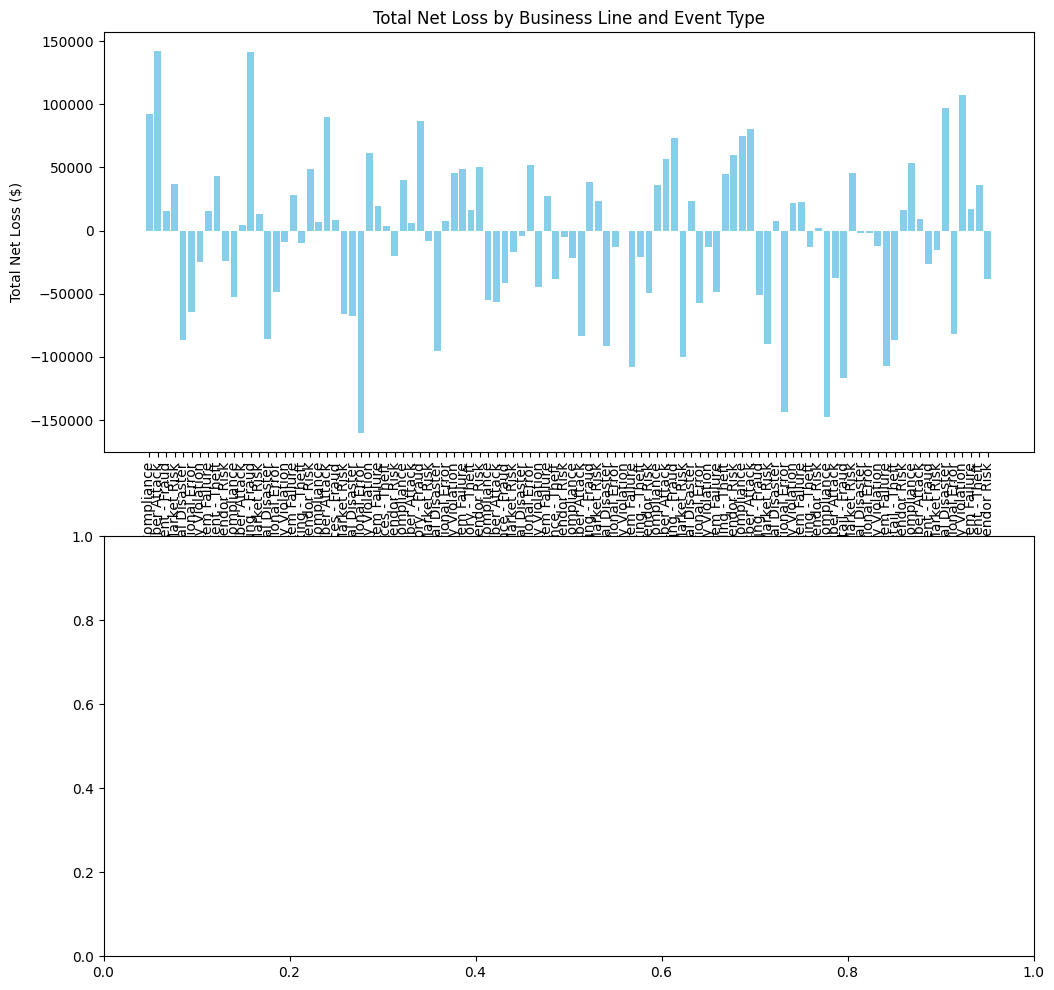

In [59]:
# Plot Total Net Loss and VaR for each combined group (Business Line + Event Type)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot Total Net Loss
ax[0].bar(combined_group['Business Line'] + ' - ' + combined_group['Event Type'], combined_group['total_net_loss'], color='skyblue')
ax[0].set_title("Total Net Loss by Business Line and Event Type")
ax[0].set_xlabel("Business Line - Event Type")
ax[0].set_ylabel("Total Net Loss ($)")
ax[0].tick_params(axis='x', rotation=90)

# Plot VaR for Net Loss
ax[1].bar(combined_group['Business Line'] + ' - ' + combined_group['Event Type'], combined_group['VaR Net Loss'], color='salmon')
ax[1].set_title("Value at Risk (VaR) for Net Loss by Business Line and Event Type")
ax[1].set_xlabel("Business Line - Event Type")
ax[1].set_ylabel("VaR for Net Loss ($)")
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
